## 1,Loading and Inspecting the Data

In [448]:
#type:ignore
import pandas as pd  # Importing pandas for data manipulation

# Load the dataset into a DataFrame
df_happiness = pd.read_csv("World-happiness-report-2024.csv")

# displaying the first 5 observations
print(df_happiness.head())
# Get information about the DataFrame


  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [449]:
print(df_happiness.info())  #printing concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB
None


## 2 Cleaning the data

### 2.1 Identifying and Handling Missing Values

In [450]:
# Count of missing values in each column
df_happiness.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [451]:
# Display rows that contain any null values
rows_with_null = df_happiness[df_happiness.isnull().any(axis=1)]
print(rows_with_null)   

           Country name                  Regional indicator  Ladder score  \
61              Bahrain        Middle East and North Africa         5.959   
87           Tajikistan  Commonwealth of Independent States         5.281   
102  State of Palestine        Middle East and North Africa         4.879   

     upperwhisker  lowerwhisker  Log GDP per capita  Social support  \
61          6.153         5.766                 NaN             NaN   
87          5.361         5.201                 NaN             NaN   
102         5.006         4.753                 NaN             NaN   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
61                       NaN                           NaN         NaN   
87                       NaN                           NaN         NaN   
102                      NaN                           NaN         NaN   

     Perceptions of corruption  Dystopia + residual  
61                         NaN                  NaN  
8

### Dropping Certain Rows

In the World Happiness Report 2024 dataset, three rows (indices 61, 87, and 102) were identified as having a high percentage of missing values,
with each row missing data in 7 out of 12 columns. After careful consideration, these rows were dropped for the following reasons:

   - High Percentage of Missing Values in the Rows

   - Large Enough Dataset for Analysis Without These Rows

   - Consistency in Data Analysis

In [452]:
# Drop rows by index
df_happiness_cleaned = df_happiness.drop([61, 87, 102])

### 2.2 Identifying and Handling Duplicates

- no duplicate rows in the df_happiness dataframe.

In [453]:
# Check for duplicate rows
df_happiness.duplicated().sum()

0

### 2.3 Checking and Handling Data Type Inconsistencies

In [454]:
# Check data types of each column
data_types = df_happiness_cleaned.dtypes
print(data_types)

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [455]:
# Check for non-numeric entries in numeric columns
numeric_cols = df_happiness_cleaned.select_dtypes(include=['int64', 'float64']).columns
non_numeric_entries = df_happiness_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce').isnull().sum()

print("Non-numeric entries in numeric columns:")
print(non_numeric_entries[non_numeric_entries > 0])

Non-numeric entries in numeric columns:
Series([], dtype: int64)


In [456]:
# Select non-numeric columns
non_numeric_cols = df_happiness_cleaned.select_dtypes(include=['object']).columns

# Check for numeric entries in non-numeric columns
numeric_in_non_numeric = {}
for col in non_numeric_cols:
    # Try to convert entries to numeric, capturing any that convert successfully
    numeric_values = pd.to_numeric(df_happiness_cleaned[col], errors='coerce')
    # Count how many entries were converted to numeric (not NaN)
    count_numeric = numeric_values.notna().sum()
    if count_numeric > 0:
        numeric_in_non_numeric[col] = count_numeric

# Output any non-numeric columns that contain numeric values
if numeric_in_non_numeric:
    print("Non-numeric columns containing numeric values:")
    for col, count in numeric_in_non_numeric.items():
        print(f"Column '{col}' contains {count} numeric values.")
else:
    print("No numeric values found in non-numeric columns.")

No numeric values found in non-numeric columns.


### 2.4 Final Check

The final DataFrame, df_happiness_cleaned, has been meticulously cleaned and now features consistent data types across all columns, along with no null values and no duplicate rows. This ensures a solid foundation for further analysis.

In [457]:
# Concise information of the data after dropping rows
print(df_happiness_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB
None


## 3. Exploratory Data Analysis

### 3.1 Data Distributions in 2024

In [458]:
# unique countries
df_happiness_cleaned['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Croatia',
       'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica', 'Peru',
       'Dominican Republic', 'Mauritius', 'Moldova', 'Russia', 'Bolivia',
       'Ecua

### Number of Countries by Region in the World Happiness Report

C:\Users\Admin\AppData\Local\Temp\ipykernel_25936\3818988421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette='viridis')


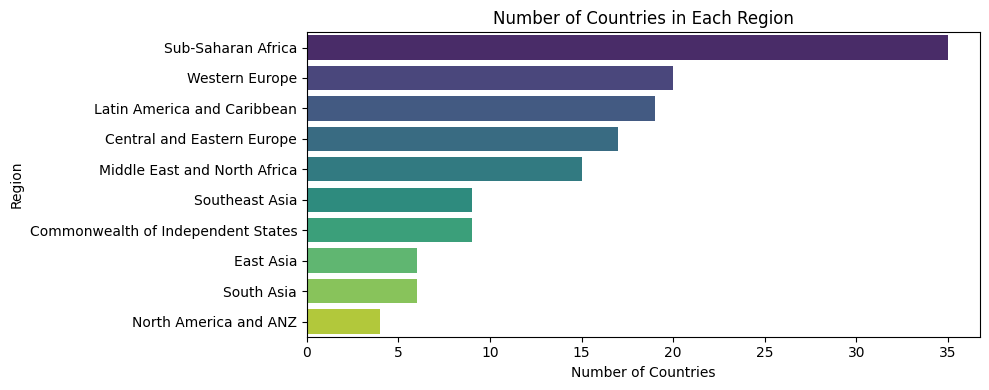

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of countries in each region
region_counts = df_happiness_cleaned['Regional indicator'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 4))  # You can adjust the size as needed

# Create the horizontal bar plot
sns.barplot(y=region_counts.index, x=region_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of Countries in Each Region')
plt.xlabel('Number of Countries')
plt.ylabel('Region')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### 3.2 Descriptive Statistics

In [460]:
# Get descriptive statistics for numerical columns
descriptive_stats = df_happiness_cleaned.describe()
print(descriptive_stats)

       Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    140.000000    140.000000    140.000000          140.000000   
mean       5.530893      5.644057      5.417700            1.378807   
std        1.181247      1.165108      1.198051            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.631750      4.762250      4.503750            1.077750   
50%        5.800500      5.911000      5.676500            1.431500   
75%        6.426250      6.515250      6.338250            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.000000                 0.

### 3.3 Bar Chart: Visualization of the Three Happiest and Three Unhappiest Countries Based on Ladder Scores

C:\Users\Admin\AppData\Local\Temp\ipykernel_25936\292901682.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_countries['Country name'], y=top_bottom_countries['Ladder score'], palette='coolwarm')


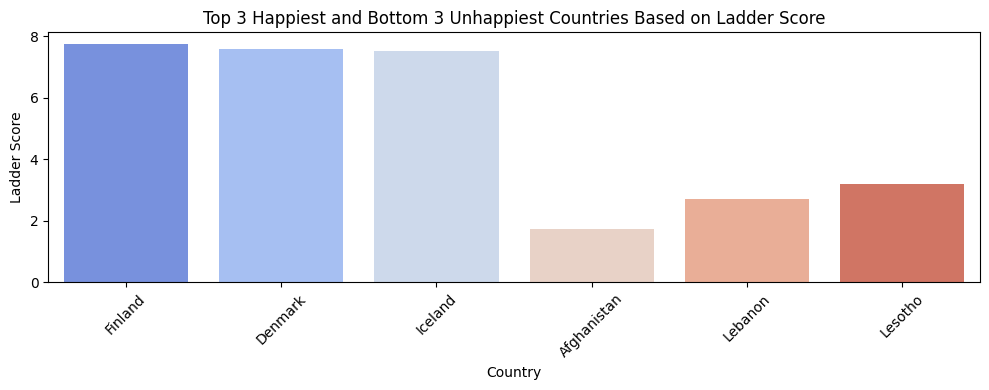

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure you have pandas imported

# Assuming 'Ladder Score' is the name of the column containing happiness scores
# Select the top 3 happiest countries
happiest_countries = df_happiness_cleaned.nlargest(3, 'Ladder score')

# Select the bottom 3 unhappiest countries
unhappiest_countries = df_happiness_cleaned.nsmallest(3, 'Ladder score')

# Combine both DataFrames
top_bottom_countries = pd.concat([happiest_countries, unhappiest_countries])

# Set the figure size
plt.figure(figsize=(10,4))

# Create the vertical bar plot
sns.barplot(x=top_bottom_countries['Country name'], y=top_bottom_countries['Ladder score'], palette='coolwarm')

# Add titles and labels
plt.title('Top 3 Happiest and Bottom 3 Unhappiest Countries Based on Ladder Score')
plt.xlabel('Country')
plt.ylabel('Ladder Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

The graph effectively illustrates the stark contrast in happiness levels among countries in the 2024 World Happiness Report, which includes data from 140 countries.

Happiest Countries:

    Finland: Ranked as the happiest country with a Ladder Score of 7.741.
    Denmark: The second happiest country with a Ladder Score of 7.583.
    Iceland: The third happiest country with a Ladder Score of 7.525.

Unhappiest Countries:

    Afghanistan: Ranked as the unhappiest country with a Ladder Score of 1.721.
    Lebanon: The second unhappiest country with a Ladder Score of 2.707.
    Lesotho: The third unhappiest country with a Ladder Score of 3.186.

This visualization highlights the critical disparities in happiness levels across different nations.


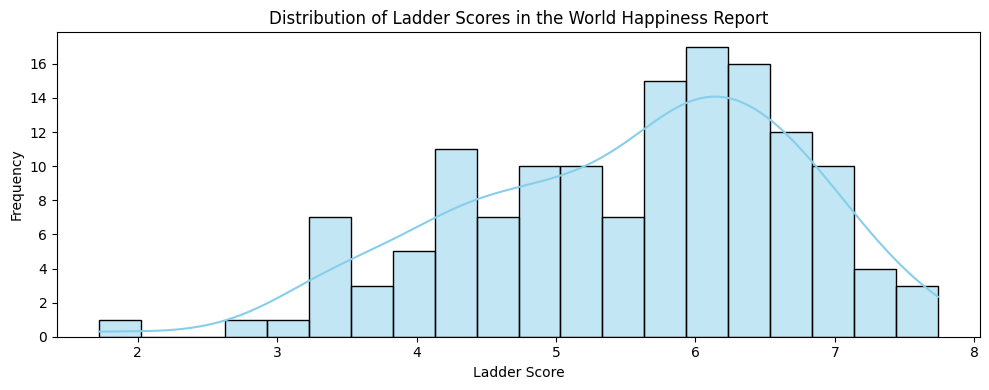

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the histogram
sns.histplot(df_happiness_cleaned['Ladder score'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Ladder Scores in the World Happiness Report')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


Histogram Distribution of Ladder Scores Among Countries

    Lowest Scores (1.72 - 3.23): Very few countries fall within this range, indicating low happiness levels.

    Mid-Range Scores (3.23 - 6.54): There is a noticeable increase in counts in the mid-range bins, particularly between 5.63 and 6.54, suggesting a concentration of countries with Ladder Scores around 5.5 to 6.5.

    Higher Scores (6.54 - 7.74): Counts decrease in the higher score bins, with only 12 countries in the 6.54 - 6.84 range and just 3 in the top bin (7.44 - 7.74), indicating a scarcity of countries with very high happiness scores.

Overall, the distribution is left-skewed, with a higher concentration of countries in the mid-range, tapering off towards the higher scores. The peaks around the bins from 5.63 to 6.54 highlight that most countries have Ladder Scores within this range.